<a href="https://colab.research.google.com/github/shaikrahul14/CS200_ClassAssignment_Calculator/blob/master/%20ML_assignment3_12041350.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# shaik rahul
# 12041350
# assignment 3

# question 1

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
data_dir = ''
train = '/content/gdrive/MyDrive/Colab Notebooks/train_NYTaxi.csv'
testt = '/content/gdrive/MyDrive/Colab Notebooks/test_NYTaxi.csv'

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
train = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/train_NYTaxi.csv", nrows = 10000)
testt = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/test_NYTaxi.csv")
train_original_copy = train.copy()

In [ ]:
print("Shape of Train: ", train.shape)
print("Shape of Test: ", testt.shape)

Shape of Train:  (10000, 9)
Shape of Test:  (9914, 7)


In [ ]:
# Check for Missing Values
train.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
testt.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
#drop the missing values from the train dataframe
train = train.drop(train[train.isnull().any(1)].index, axis = 0)

In [ ]:
train.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
train.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,11.294449,-72.380947,39.848149,-72.358410,39.828797,1.670600
std,2886.89568,9.716343,12.958159,7.583272,10.984364,6.600468,1.298562
min,0.00000,2.500000,-736.516667,-73.998727,-74.184320,-74.006870,0.000000
25%,2499.75000,6.000000,-73.992111,40.734734,-73.991447,40.734570,1.000000
50%,4999.50000,8.500000,-73.981871,40.752419,-73.980118,40.753234,1.000000
75%,7499.25000,12.500000,-73.966430,40.767107,-73.963420,40.768127,2.000000
max,9999.00000,176.000000,40.768962,404.666667,40.776015,44.640672,6.000000


In [ ]:
testt.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
train['fare_amount'].head()

0     4.9
1     4.9
2     6.9
3    14.1
4    12.1
Name: fare_amount, dtype: float64

In [ ]:
print("Shape of Train: ", train.shape)

Shape of Train:  (10000, 9)


In [ ]:
print('No.of non-positive fare_amoun values is',train[train['fare_amount'] <= 0 ].shape[0])
print()
train[train['fare_amount'] <= 0 ].head()

No.of non-positive fare_amoun values is 0



,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [ ]:
train.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,11.294449,-72.380947,39.848149,-72.358410,39.828797,1.670600
std,2886.89568,9.716343,12.958159,7.583272,10.984364,6.600468,1.298562
min,0.00000,2.500000,-736.516667,-73.998727,-74.184320,-74.006870,0.000000
25%,2499.75000,6.000000,-73.992111,40.734734,-73.991447,40.734570,1.000000
50%,4999.50000,8.500000,-73.981871,40.752419,-73.980118,40.753234,1.000000
75%,7499.25000,12.500000,-73.966430,40.767107,-73.963420,40.768127,2.000000
max,9999.00000,176.000000,40.768962,404.666667,40.776015,44.640672,6.000000


In [ ]:
testt.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [ ]:
train = train[train['fare_amount'] > 0 ]

In [ ]:
train.drop_duplicates(inplace=True)

In [ ]:
train['fare_amount'].describe()

count    10000.000000
mean        11.294449
std          9.716343
min          2.500000
25%          6.000000
50%          8.500000
75%         12.500000
max        176.000000
Name: fare_amount, dtype: float64

In [ ]:
## New york co rodinates
train = train[(train['pickup_latitude']>40)&(train['pickup_latitude']<45)]
train = train[(train['dropoff_latitude']>40)&(train['dropoff_latitude']<45)]

train = train[(train['pickup_longitude']<-71)&(train['pickup_longitude']>-79)]
train = train[(train['dropoff_longitude']<-71)&(train['dropoff_longitude']>-79)]

In [ ]:
print(train.shape)

(9771, 9)


In [ ]:
# convert train dataset

train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])
train.head()
#Convert for test data
testt['key'] = pd.to_datetime(testt['key'])
testt['pickup_datetime']  = pd.to_datetime(testt['pickup_datetime'])

In [ ]:
train.dtypes

Unnamed: 0                         int64
key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [ ]:
testt.dtypes

key                       datetime64[ns]
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [ ]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, testt]
    for i in data:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])

        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])

        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2

        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [ ]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

In [ ]:
train  = train[train['H_Distance'] >0]

In [ ]:
train.shape

(9670, 10)

In [ ]:

data = [train,testt]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [ ]:
train

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,0,2009-04-08 19:11:10.000000400,4.90,2009-04-08 19:11:10+00:00,-73.998287,40.727490,-73.989854,40.735239,2,1.116850,2009,4,8,2,19
1,1,2012-07-30 16:19:08.000000300,4.90,2012-07-30 16:19:08+00:00,-73.966597,40.794345,-73.965682,40.803808,2,1.055053,2012,7,30,0,16
2,2,2011-02-22 13:35:00.000000121,6.90,2011-02-22 13:35:00+00:00,-73.971638,40.763382,-73.953767,40.783715,1,2.715959,2011,2,22,1,13
3,3,2010-10-07 21:09:35.000000200,14.10,2010-10-07 21:09:35+00:00,-74.003545,40.707399,-73.981312,40.750071,1,5.101370,2010,10,7,3,21
4,4,2009-10-02 22:51:00.000000140,12.10,2009-10-02 22:51:00+00:00,-74.004532,40.707465,-73.977908,40.745633,5,4.800593,2009,10,2,4,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,2014-02-10 07:56:00.000000162,13.00,2014-02-10 07:56:00+00:00,-73.998187,40.728940,-73.996792,40.725597,4,0.389869,2014,2,10,0,7
9996,9996,2014-06-15 20:41:00.000000330,57.33,2014-06-15 20:41:00+00:00,-73.789587,40.643357,-74.004477,40.721695,2,20.105136,2014,6,15,6,20
9997,9997,2015-04-26 22:36:46.000000400,6.00,2015-04-26 22:36:46+00:00,-73.982986,40.734833,-73.997734,40.725758,2,1.600792,2015,4,26,6,22
9998,9998,2009-05-13 12:44:00.000000720,5.30,2009-05-13 12:44:00+00:00,-74.013515,40.707555,-74.004795,40.721182,1,1.684083,2009,5,13,2,12


In [ ]:
train['Year'] = train['Year'].astype(str)
testt['Year'] = testt['Year'].astype(str)

In [ ]:
train = train.drop(['key','pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1)
testt = testt.drop(['key','pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1)


In [ ]:
train = train[train['passenger_count'] >0]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9643 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9643 non-null   int64  
 1   fare_amount      9643 non-null   float64
 2   passenger_count  9643 non-null   int64  
 3   H_Distance       9643 non-null   float64
 4   Year             9643 non-null   object 
 5   Month            9643 non-null   int64  
 6   Date             9643 non-null   int64  
 7   Day of Week      9643 non-null   int64  
 8   Hour             9643 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 753.4+ KB


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
train.shape

(9643, 9)

In [ ]:
from keras import backend as K

In [ ]:
def rmse(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [ ]:
train = train.drop('Unnamed: 0',axis=1)

In [ ]:
x = train.drop('fare_amount',axis=1)
y = train['fare_amount']

In [ ]:
testt.head()

,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,1,2.323260,2015,1,27,1,13
1,1,2.425353,2015,1,27,1,13
2,1,0.618628,2011,10,8,5,11
3,1,1.961033,2012,12,1,5,21
4,1,5.387301,2012,12,1,5,21


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

x = scaler.fit_transform(x)

testt = scaler.transform(testt)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)

In [ ]:
x_train.shape

(6750, 7)

In [ ]:
x_train[0][1]

-0.41822334984740517

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import SGD,RMSprop,Adam

In [ ]:
# define a deep neural network model


model = keras.Sequential([

  keras.layers.Dense(16, activation='sigmoid', input_dim=x_train.shape[1]),
  keras.layers.BatchNormalization(),



  keras.layers.Dense(8, activation='sigmoid'),
  keras.layers.BatchNormalization(),

  keras.layers.Dense(1)
])

model.compile(loss=rmse,
            optimizer=SGD(learning_rate=0.01), metrics=['mae','mse','mape'])

In [ ]:
%%time
Batch =128
ep =50
history =model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // Batch,
    batch_size=    Batch,
    epochs=ep, verbose=1)

Epoch 1/50
53/53 [==============================] - 1s 6ms/step - loss: 13.9498 - mae: 10.7204 - mse: 197.7396 - mape: 96.6956 - val_loss: 13.7871 - val_mae: 9.9924 - val_mse: 193.6795 - val_mape: 82.4778
Epoch 2/50
53/53 [==============================] - 0s 2ms/step - loss: 12.1162 - mae: 9.2714 - mse: 152.2157 - mape: 84.2007 - val_loss: 12.1301 - val_mae: 7.7799 - val_mse: 151.1060 - val_mape: 55.6891
Epoch 3/50
53/53 [==============================] - 0s 2ms/step - loss: 9.0809 - mae: 6.4189 - mse: 86.2762 - mape: 57.7267 - val_loss: 9.5233 - val_mae: 5.0375 - val_mse: 95.2442 - val_mape: 35.4901
Epoch 4/50
53/53 [==============================] - 0s 2ms/step - loss: 5.4740 - mae: 3.1880 - mse: 34.4096 - mape: 28.6985 - val_loss: 8.1304 - val_mae: 4.6138 - val_mse: 70.7654 - val_mape: 43.4101
Epoch 5/50
53/53 [==============================] - 0s 2ms/step - loss: 4.7419 - mae: 2.7024 - mse: 26.3080 - mape: 25.2911 - val_loss: 7.4482 - val_mae: 4.0563 - val_mse: 60.2336 - val_mape:

In [ ]:
model.evaluate(x_test,y_test)

91/91 [==============================] - 0s 1ms/step - loss: 3.8058 - mae: 2.2309 - mse: 25.3813 - mape: 20.8860


[3.805764675140381, 2.230881452560425, 25.381271362304688, 20.885984420776367]

In [ ]:
pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error,mean_absolute_error

In [ ]:
print("MAPE: ",mean_absolute_percentage_error(y_test,pred))

MAPE:  0.2088598065109508


In [ ]:
print("MAE: ",mean_absolute_error(y_test,pred))

MAE:  2.230881911177887


In [ ]:
print("MSE: ",mean_squared_error(y_test,pred))

MSE:  25.381274210257185


In [ ]:
mod1=[mean_absolute_percentage_error(y_test,pred),mean_absolute_error(y_test,pred),mean_squared_error(y_test,pred)]

In [ ]:
# define a deep neural network model


model = keras.Sequential([

  keras.layers.Dense(32, activation='sigmoid', input_dim=x_train.shape[1]),
  keras.layers.BatchNormalization(),

  keras.layers.Dense(16, activation='sigmoid'),
  keras.layers.BatchNormalization(),


  keras.layers.Dense(8, activation='sigmoid'),
  keras.layers.BatchNormalization(),

  keras.layers.Dense(1)
])

model.compile(loss=rmse,
            optimizer=SGD(learning_rate=0.01), metrics=['mae','mse','mape'])


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                256       
                                                                 
 batch_normalization_7 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_8 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 8)                 136       
                                                                 
 batch_normalization_9 (Batc  (None, 8)               

In [ ]:
%%time
Batch =128
ep =50
history =model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // Batch,
    batch_size=    Batch,
    epochs=ep, verbose=1)

Epoch 1/50
53/53 [==============================] - 1s 6ms/step - loss: 14.2063 - mae: 10.6719 - mse: 204.3861 - mape: 93.1184 - val_loss: 13.7843 - val_mae: 9.9492 - val_mse: 193.6352 - val_mape: 81.7042
Epoch 2/50
53/53 [==============================] - 0s 2ms/step - loss: 11.5155 - mae: 9.0336 - mse: 137.1443 - mape: 85.3312 - val_loss: 11.8564 - val_mae: 7.2362 - val_mse: 144.7059 - val_mape: 48.7949
Epoch 3/50
53/53 [==============================] - 0s 2ms/step - loss: 7.8147 - mae: 5.6828 - mse: 65.5675 - mape: 57.4848 - val_loss: 9.6304 - val_mae: 5.2326 - val_mse: 97.4058 - val_mape: 42.0601
Epoch 4/50
53/53 [==============================] - 0s 2ms/step - loss: 5.2491 - mae: 3.1302 - mse: 31.7497 - mape: 29.9905 - val_loss: 8.9838 - val_mae: 5.4022 - val_mse: 85.2548 - val_mape: 54.6842
Epoch 5/50
53/53 [==============================] - 0s 2ms/step - loss: 4.8453 - mae: 2.8075 - mse: 26.6776 - mape: 27.3697 - val_loss: 8.4161 - val_mae: 5.0575 - val_mse: 75.3718 - val_mape:

In [ ]:
model.evaluate(x_test,y_test)

91/91 [==============================] - 0s 1ms/step - loss: 3.9349 - mae: 2.3812 - mse: 26.0022 - mape: 23.3423


[3.9349236488342285, 2.3811798095703125, 26.00218963623047, 23.342302322387695]

In [ ]:
pred=model.predict(x_test)

In [ ]:
mod2=[mean_absolute_percentage_error(y_test,pred),mean_absolute_error(y_test,pred),mean_squared_error(y_test,pred)]

In [ ]:
mod2

[0.23342297557295466, 2.38117942109225, 26.002189965631793]

In [ ]:
# define a deep neural network model


model = keras.Sequential([
  keras.layers.Dense(32, activation='sigmoid', input_dim=x_train.shape[1]),
  keras.layers.BatchNormalization(),

  keras.layers.Dense(32, activation='sigmoid'),
  keras.layers.BatchNormalization(),

  keras.layers.Dense(16, activation='sigmoid'),
  keras.layers.BatchNormalization(),


  keras.layers.Dense(8, activation='sigmoid'),
  keras.layers.BatchNormalization(),

  keras.layers.Dense(1)
])

model.compile(loss=rmse,
            optimizer=SGD(learning_rate=0.01), metrics=['mae','mse','mape'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 32)                256       
                                                                 
 batch_normalization_14 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dense_20 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_15 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dense_21 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_16 (Bat  (None, 16)              

In [ ]:
%%time
Batch =128
ep =50
history =model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // Batch,
    batch_size=    Batch,
    epochs=ep, verbose=1)

Epoch 1/50
53/53 [==============================] - 2s 7ms/step - loss: 12.9861 - mae: 10.3446 - mse: 173.2008 - mape: 98.1474 - val_loss: 12.6540 - val_mae: 8.3366 - val_mse: 164.0558 - val_mape: 61.4655
Epoch 2/50
53/53 [==============================] - 0s 2ms/step - loss: 9.4688 - mae: 7.5182 - mse: 94.1626 - mape: 78.3975 - val_loss: 10.3478 - val_mae: 5.5187 - val_mse: 111.6686 - val_mape: 38.0885
Epoch 3/50
53/53 [==============================] - 0s 2ms/step - loss: 6.1378 - mae: 3.9773 - mse: 41.3852 - mape: 40.4317 - val_loss: 9.3496 - val_mae: 5.7976 - val_mse: 91.9074 - val_mape: 60.9548
Epoch 4/50
53/53 [==============================] - 0s 2ms/step - loss: 5.0562 - mae: 2.9411 - mse: 28.6247 - mape: 28.7843 - val_loss: 9.1282 - val_mae: 5.8778 - val_mse: 87.7048 - val_mape: 64.8497
Epoch 5/50
53/53 [==============================] - 0s 3ms/step - loss: 4.8931 - mae: 2.8905 - mse: 27.0964 - mape: 28.8429 - val_loss: 8.6367 - val_mae: 5.3490 - val_mse: 79.0904 - val_mape: 5

In [ ]:
model.evaluate(x_test,y_test)

91/91 [==============================] - 0s 1ms/step - loss: 3.8408 - mae: 2.2549 - mse: 25.6586 - mape: 21.1417


[3.8408145904541016, 2.2549476623535156, 25.658588409423828, 21.14166259765625]

In [ ]:
# define a deep neural network model


model = keras.Sequential([

  keras.layers.Dense(32, activation='relu', input_dim=x_train.shape[1]),
  keras.layers.BatchNormalization(),

  keras.layers.Dense(16, activation='relu'),
  keras.layers.BatchNormalization(),


  keras.layers.Dense(8, activation='relu'),
  keras.layers.BatchNormalization(),

  keras.layers.Dense(1)
])

model.compile(loss=rmse,
            optimizer=SGD(learning_rate=0.01), metrics=['mae','mse','mape'])

In [ ]:

%%time
Batch =128
ep =50
history =model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // Batch,
    batch_size=    Batch,
    epochs=ep, verbose=1)

Epoch 1/50
53/53 [==============================] - 1s 6ms/step - loss: 14.0686 - mae: 10.7000 - mse: 203.1462 - mape: 94.0475 - val_loss: 13.9753 - val_mae: 10.2890 - val_mse: 198.8626 - val_mape: 86.5939
Epoch 2/50
53/53 [==============================] - 0s 3ms/step - loss: 12.6881 - mae: 9.3182 - mse: 164.7513 - mape: 80.4520 - val_loss: 12.3441 - val_mae: 8.2871 - val_mse: 156.2979 - val_mape: 63.1186
Epoch 3/50
53/53 [==============================] - 0s 2ms/step - loss: 10.2288 - mae: 7.0000 - mse: 109.0290 - mape: 59.0241 - val_loss: 9.3769 - val_mae: 5.4377 - val_mse: 92.2566 - val_mape: 37.2567
Epoch 4/50
53/53 [==============================] - 0s 3ms/step - loss: 6.4141 - mae: 3.8748 - mse: 45.6348 - mape: 34.2453 - val_loss: 6.2384 - val_mae: 3.4474 - val_mse: 44.1861 - val_mape: 29.4467
Epoch 5/50
53/53 [==============================] - 0s 2ms/step - loss: 4.9391 - mae: 2.7862 - mse: 27.6728 - mape: 26.9692 - val_loss: 5.4436 - val_mae: 3.0114 - val_mse: 35.3244 - val_ma

In [ ]:
model.evaluate(x_test,y_test)

91/91 [==============================] - 0s 1ms/step - loss: 4.3428 - mae: 2.5161 - mse: 29.7442 - mape: 22.6849


[4.34284782409668, 2.516073703765869, 29.744205474853516, 22.6849365234375]

In [ ]:
pred=model.predict(x_test)
mod3=[mean_absolute_percentage_error(y_test,pred),mean_absolute_error(y_test,pred),mean_squared_error(y_test,pred)]

In [ ]:
mod3

[0.2268493537105665, 2.5160740906649135, 29.744201804888785]

In [ ]:
# define a deep neural network model


model = keras.Sequential([

  keras.layers.Dense(32, activation='relu', input_dim=x_train.shape[1]),
  keras.layers.BatchNormalization(),

  keras.layers.Dense(16, activation='relu'),
  keras.layers.BatchNormalization(),


  keras.layers.Dense(8, activation='softmax'),
  keras.layers.BatchNormalization(),

  keras.layers.Dense(1)
])

model.compile(loss=rmse,
            optimizer=SGD(learning_rate=0.01), metrics=['mae','mse','mape'])

In [ ]:
%%time
Batch =128
ep =50
history =model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // Batch,
    batch_size=    Batch,
    epochs=ep, verbose=1)

Epoch 1/50
53/53 [==============================] - 1s 6ms/step - loss: 14.1110 - mae: 10.8045 - mse: 202.0917 - mape: 95.9702 - val_loss: 14.2490 - val_mae: 10.5968 - val_mse: 206.5316 - val_mape: 89.9631
Epoch 2/50
53/53 [==============================] - 0s 2ms/step - loss: 12.7426 - mae: 9.6463 - mse: 165.8486 - mape: 84.9560 - val_loss: 13.0047 - val_mae: 9.0237 - val_mse: 172.8582 - val_mape: 70.8088
Epoch 3/50
53/53 [==============================] - 0s 2ms/step - loss: 10.3490 - mae: 7.4462 - mse: 111.4665 - mape: 64.0407 - val_loss: 10.5966 - val_mae: 6.0875 - val_mse: 116.4871 - val_mape: 39.2726
Epoch 4/50
53/53 [==============================] - 0s 2ms/step - loss: 6.7669 - mae: 4.0499 - mse: 50.5638 - mape: 33.6452 - val_loss: 8.1934 - val_mae: 4.5258 - val_mse: 71.7353 - val_mape: 38.6737
Epoch 5/50
53/53 [==============================] - 0s 2ms/step - loss: 4.8584 - mae: 2.7488 - mse: 27.2937 - mape: 26.0221 - val_loss: 7.7165 - val_mae: 4.4079 - val_mse: 64.1974 - val_

In [ ]:
model.evaluate(x_test,y_test)

91/91 [==============================] - 0s 1ms/step - loss: 4.1817 - mae: 2.4506 - mse: 28.1282 - mape: 22.8611


[4.181682586669922, 2.4506096839904785, 28.12818145751953, 22.861083984375]

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
# define a deep neural network model


model = keras.Sequential([
  keras.layers.Dense(32, activation='sigmoid', input_dim=x_train.shape[1]),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(8, activation='sigmoid'),
  keras.layers.BatchNormalization(),

  keras.layers.Dense(1)
])

model.compile(loss=rmse,
            optimizer=tf.keras.optimizers.Adam(0.001),metrics=['mae','mse','mape'])

In [ ]:
%%time
Batch =128
ep =50
history =model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // Batch,
    batch_size=    Batch,
    epochs=ep, verbose=1,callbacks=[callback])

Epoch 1/50
53/53 [==============================] - 1s 5ms/step - loss: 14.0256 - mae: 11.1200 - mse: 199.5275 - mape: 103.4109 - val_loss: 14.7392 - val_mae: 11.2729 - val_mse: 220.6039 - val_mape: 98.6861
Epoch 2/50
53/53 [==============================] - 0s 3ms/step - loss: 12.9977 - mae: 10.8612 - mse: 172.8489 - mape: 107.8699 - val_loss: 14.6490 - val_mae: 11.2635 - val_mse: 217.9119 - val_mape: 99.2087
Epoch 3/50
53/53 [==============================] - 0s 2ms/step - loss: 12.1654 - mae: 10.5201 - mse: 151.1395 - mape: 110.0842 - val_loss: 14.4961 - val_mae: 11.2396 - val_mse: 213.3867 - val_mape: 99.9449
Epoch 4/50
53/53 [==============================] - 0s 2ms/step - loss: 11.4561 - mae: 10.0972 - mse: 133.6293 - mape: 109.6219 - val_loss: 14.2119 - val_mae: 11.1219 - val_mse: 205.1527 - val_mape: 99.9728
Epoch 5/50
53/53 [==============================] - 0s 2ms/step - loss: 10.8072 - mae: 9.6019 - mse: 119.0057 - mape: 106.5202 - val_loss: 13.7049 - val_mae: 10.8505 - val_

In [ ]:
model.evaluate(x_test,y_test)

91/91 [==============================] - 0s 1ms/step - loss: 3.9822 - mae: 2.5768 - mse: 26.3505 - mape: 27.8195


[3.9821743965148926,
 2.5767698287963867,
 26.350543975830078,
 27.819459915161133]

In [ ]:
pred=model.predict(x_test)
mod4=[mean_absolute_percentage_error(y_test,pred),mean_absolute_error(y_test,pred),mean_squared_error(y_test,pred)]

In [ ]:
mod4

[0.27819457142274884, 2.576769864714932, 26.350545490098714]

In [ ]:
model = keras.Sequential([

  keras.layers.Dense(32, activation='relu', input_dim=x_train.shape[1]),
  keras.layers.BatchNormalization(),
  Dropout(0.3) ,

  keras.layers.Dense(16, activation='relu'),
  keras.layers.BatchNormalization(),
  Dropout(0.3) ,


  keras.layers.Dense(8, activation='softmax'),
  keras.layers.BatchNormalization(),
  Dropout(0.3) ,

  keras.layers.Dense(1)
])

model.compile(loss=rmse,
            optimizer=SGD(learning_rate=0.01), metrics=['mae','mse','mape'])

In [ ]:
%%time
Batch =128
ep =50
history =model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // Batch,
    batch_size=    Batch,
    epochs=ep, verbose=1)

Epoch 1/50
53/53 [==============================] - 1s 6ms/step - loss: 14.2717 - mae: 10.7655 - mse: 206.3349 - mape: 94.7258 - val_loss: 14.1718 - val_mae: 10.4823 - val_mse: 204.3689 - val_mape: 88.4717
Epoch 2/50
53/53 [==============================] - 0s 3ms/step - loss: 13.1370 - mae: 9.6360 - mse: 175.3357 - mape: 82.7707 - val_loss: 13.0676 - val_mae: 9.0577 - val_mse: 174.5221 - val_mape: 71.0067
Epoch 3/50
53/53 [==============================] - 0s 3ms/step - loss: 11.4499 - mae: 7.9084 - mse: 136.3530 - mape: 64.7290 - val_loss: 11.3060 - val_mae: 6.7945 - val_mse: 131.9605 - val_mape: 45.2936
Epoch 4/50
53/53 [==============================] - 0s 2ms/step - loss: 9.4712 - mae: 5.8356 - mse: 92.3554 - mape: 47.3343 - val_loss: 9.3239 - val_mae: 4.9745 - val_mse: 91.5055 - val_mape: 34.7100
Epoch 5/50
53/53 [==============================] - 0s 3ms/step - loss: 7.8776 - mae: 4.7631 - mse: 65.0080 - mape: 43.0854 - val_loss: 8.1201 - val_mae: 4.4676 - val_mse: 70.6585 - val_

In [ ]:
model.evaluate(x_test,y_test)

91/91 [==============================] - 0s 1ms/step - loss: 4.8811 - mae: 2.6779 - mse: 34.5202 - mape: 22.8798


[4.881089210510254, 2.677891731262207, 34.52021408081055, 22.879837036132812]

In [ ]:
pred=model.predict(x_test)
mod5=[mean_absolute_percentage_error(y_test,pred),mean_absolute_error(y_test,pred),mean_squared_error(y_test,pred)]

In [ ]:
mod5

[0.22879831965881753, 2.677891631240133, 34.520221820316536]

In [ ]:
model = keras.Sequential([

  keras.layers.Dense(32, activation='relu', input_dim=x_train.shape[1]),
  keras.layers.BatchNormalization(),
  Dropout(0.3) ,



  keras.layers.Dense(8, activation='softmax'),
  keras.layers.BatchNormalization(),
  Dropout(0.3) ,

  keras.layers.Dense(1)
])

model.compile(loss=rmse,
            optimizer=RMSprop(learning_rate=0.01), metrics=['mae','mse','mape'])

In [ ]:

%%time
Batch =128
ep =50
history =model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // Batch,
    batch_size=    Batch,
    epochs=ep, verbose=1)

Epoch 1/50
53/53 [==============================] - 2s 7ms/step - loss: 11.4615 - mae: 8.8874 - mse: 137.4388 - mape: 84.0699 - val_loss: 11.5051 - val_mae: 7.0416 - val_mse: 136.3922 - val_mape: 47.5561
Epoch 2/50
53/53 [==============================] - 0s 4ms/step - loss: 6.8829 - mae: 4.4546 - mse: 50.7060 - mape: 41.2619 - val_loss: 9.2229 - val_mae: 5.2644 - val_mse: 89.6049 - val_mape: 47.7586
Epoch 3/50
53/53 [==============================] - 0s 4ms/step - loss: 6.0618 - mae: 3.6804 - mse: 39.6541 - mape: 36.2243 - val_loss: 9.1194 - val_mae: 5.2683 - val_mse: 87.7147 - val_mape: 49.4201
Epoch 4/50
53/53 [==============================] - 0s 5ms/step - loss: 5.8195 - mae: 3.5080 - mse: 36.3843 - mape: 34.0456 - val_loss: 8.8691 - val_mae: 5.0687 - val_mse: 83.2299 - val_mape: 46.4477
Epoch 5/50
53/53 [==============================] - 0s 3ms/step - loss: 5.7852 - mae: 3.3992 - mse: 37.0866 - mape: 32.3933 - val_loss: 8.5275 - val_mae: 4.9083 - val_mse: 77.3114 - val_mape: 46.4

In [ ]:
pred=model.predict(x_test)
m6=[mean_absolute_percentage_error(y_test,pred),mean_absolute_error(y_test,pred),mean_squared_error(y_test,pred)]

In [ ]:
m6

[0.2149659186455016, 2.621181261403479, 32.683377043442626]

In [ ]:
model = keras.Sequential([

  keras.layers.Dense(32, activation='relu', input_dim=x_train.shape[1]),
  keras.layers.BatchNormalization(),
  Dropout(0.3) ,



  keras.layers.Dense(8, activation='softmax'),
  keras.layers.BatchNormalization(),
  Dropout(0.3) ,

  keras.layers.Dense(1)
])

model.compile(loss=rmse,
            optimizer=Adam(learning_rate=0.1), metrics=['mae','mse','mape'])

In [ ]:

%%time
Batch =128
ep =50
history =model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // Batch,
    batch_size=    Batch,
    epochs=ep, verbose=1)

Epoch 1/50
53/53 [==============================] - 2s 5ms/step - loss: 8.6453 - mae: 5.7235 - mse: 79.8302 - mape: 57.7594 - val_loss: 9.3402 - val_mae: 5.1308 - val_mse: 91.7429 - val_mape: 39.2877
Epoch 2/50
53/53 [==============================] - 0s 2ms/step - loss: 7.4273 - mae: 4.5695 - mse: 58.7558 - mape: 45.3208 - val_loss: 8.5439 - val_mae: 4.7632 - val_mse: 77.6676 - val_mape: 38.2860
Epoch 3/50
53/53 [==============================] - 0s 2ms/step - loss: 6.9837 - mae: 4.2394 - mse: 51.7473 - mape: 43.5481 - val_loss: 7.4297 - val_mae: 4.1725 - val_mse: 60.0726 - val_mape: 38.9378
Epoch 4/50
53/53 [==============================] - 0s 2ms/step - loss: 6.9361 - mae: 4.1978 - mse: 50.7194 - mape: 42.5619 - val_loss: 8.1491 - val_mae: 4.7318 - val_mse: 70.9492 - val_mape: 41.6095
Epoch 5/50
53/53 [==============================] - 0s 2ms/step - loss: 7.1436 - mae: 4.3305 - mse: 54.3426 - mape: 43.7799 - val_loss: 7.5745 - val_mae: 4.4522 - val_mse: 62.1321 - val_mape: 41.8248


In [ ]:
pred=model.predict(x_test)
mod7=[mean_absolute_percentage_error(y_test,pred),mean_absolute_error(y_test,pred),mean_squared_error(y_test,pred)]

In [ ]:
mod7

[0.4441445125642112, 4.145992776031441, 46.74090220961242]

In [ ]:
table=pd.DataFrame({"BaseLine NN":mod1,"Diffrent Neurons and Layers":mod2,"relu activaton":mod3,"Early Stopping":mod4,"Dropout":mod5,"RmsProp optimizer":m6,"Adam":mod7},index=["MAPE",'MAE','MSE'])

In [ ]:
table

,BaseLine NN,Diffrent Neurons and Layers,relu activaton,Early Stopping,Dropout,RmsProp optimizer,Adam
MAPE,0.208860,0.233423,0.226849,0.278195,0.228798,0.214966,0.444145
MAE,2.230882,2.381179,2.516074,2.576770,2.677892,2.621181,4.145993
MSE,25.381274,26.002190,29.744202,26.350545,34.520222,32.683377,46.740902


In [ ]:
from scipy.stats import t

In [ ]:
f_mape=np.array(table.loc['MAPE'].tolist())
f_mae=np.array(table.loc['MAE'].tolist())
f_mse=np.array(table.loc['MSE'].tolist())

In [ ]:
def confi(arr):
    m=arr.mean()
    s=arr.std()
    dof=len(arr)-1
    conf=0.95
    t_crit = np.abs(t.ppf((1-conf)/2,dof))
    return [m-s*t_crit/np.sqrt(len(arr)), m+s*t_crit/np.sqrt(len(arr))]

In [ ]:
con_mape=confi(f_mape)
con_mae=confi(f_mae)
con_mse=confi(f_mse)

In [ ]:
con_mape,con_mae,con_mse

([0.19085508009857693, 0.3334979079259233],
 [2.187515108921906, 3.283905164313818],
 [25.186743370633977, 38.07688878486547])

In [ ]:
conftable=pd.DataFrame({"Min":[con_mape[0],con_mae[0],con_mse[0]],"Max":[con_mape[1],con_mae[1],con_mse[1]]},index=["MAPE",'MAE','MSE'])

In [ ]:
conftable

,Min,Max
MAPE,0.190855,0.333498
MAE,2.187515,3.283905
MSE,25.186743,38.076889


# question2

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)
from sklearn.metrics import f1_score
from matplotlib import style

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
data_dir = ''
train_path = '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train'
test_path = '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/test'


In [ ]:
f=os.listdir(train_path)
for x in f :
  print(x)

motorcycle
seaplane
bicycle
motorbus
boat
truck
airplane


In [ ]:
folders = ['motorbus', 'boat', 'seaplane', 'motorcycle', 'truck', 'airplane', 'bicycle']
c =[]
train = []
d = 0
print('  Train Dataset contains')
print('Labels in Dataset :',folders)
for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    for i in train_files:
        train.append(train_path + '/' + folder+'/'+i)
    print('Length of ',folder,'folder is',len(train_files))
    c.append(len(train_files))
print('<--------------------------->')
print(' Test Dataset contains')
## test dataset
test =[]
d =[]
print('Labels in Dataset :',folders)
for folder in folders:
    test_files = os.listdir(test_path + '/' + folder)
    for i in test_files:
        test.append(train_path + '/' + folder+'/'+i)
    print('Length of ',folder,'folder is',len(test_files))
    d.append(len(test_files))

 In Train Dataset
Labels in Dataset : ['motorbus', 'boat', 'seaplane', 'motorcycle', 'truck', 'airplane', 'bicycle']
Length of  motorbus folder is 256
Length of  boat folder is 528
Length of  seaplane folder is 280
Length of  motorcycle folder is 592
Length of  truck folder is 656
Length of  airplane folder is 402
Length of  bicycle folder is 304
<--------------------------->
In Test Dataset
Labels in Dataset : ['motorbus', 'boat', 'seaplane', 'motorcycle', 'truck', 'airplane', 'bicycle']
Length of  motorbus folder is 61
Length of  boat folder is 134
Length of  seaplane folder is 75
Length of  motorcycle folder is 141
Length of  truck folder is 163
Length of  airplane folder is 101
Length of  bicycle folder is 71


In [ ]:
print('all images in Train  ',sum(c))
print('all images in Test  ',sum(d))

all images in Train   3018
all images in Test   1


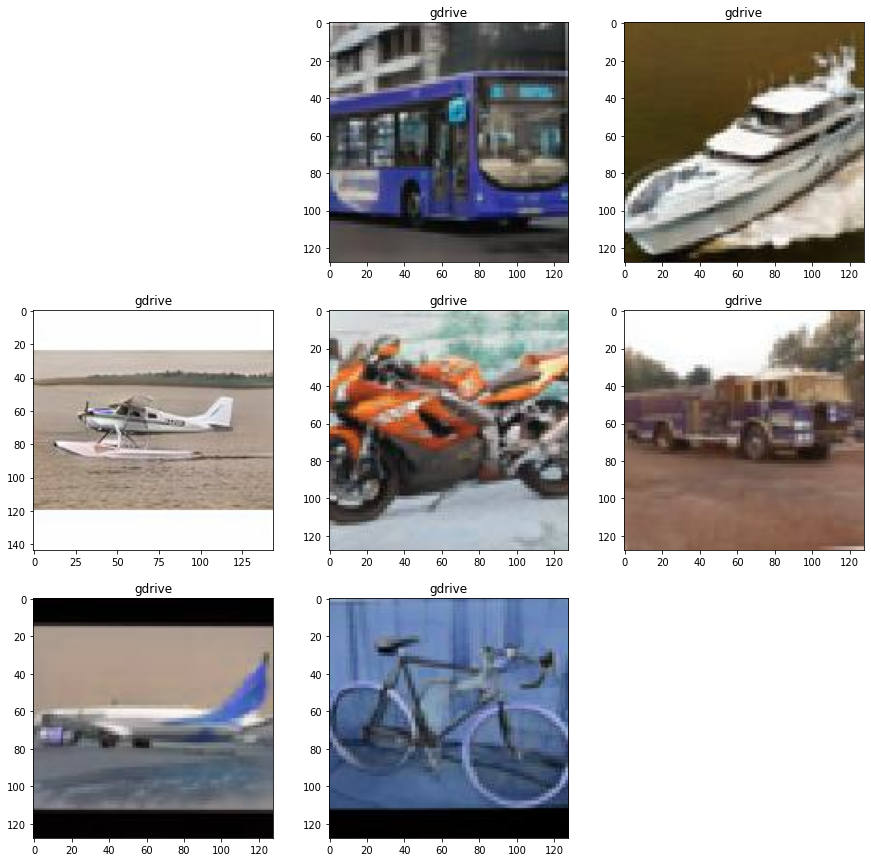

In [ ]:
import cv2
import random
e =0
f = c[0]
plt.figure(figsize=(15, 15))
for i in range(1,len(c)+1):
    ax = plt.subplot(3, 3, i + 1)
    random_img_path =  random.choice(train[e:f])
    rand_img = cv2.imread(random_img_path)
    z = random_img_path.split('/')[2]
    plt.title(z)
    plt.imshow(rand_img)

    if i < 7:
        e+=c[i-1]
        f+=c[i]

In [ ]:

vehicle_dict = {}
for fo in folders:
    train_files = os.listdir(train_path + '/' + fo)
    l =[]
    for i in train_files:
        y = train_path + '/' + fo + '/' + i
        if y in l:
            pass
        else:

            l.append(y)


    vehicle_dict[fo] = l

vehicle_dict

{'motorbus': ['/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650199999123_6.jpg',
  '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650230357383_5.jpg',
  '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650229136939_4.jpg',
  '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650229239378_13.jpg',
  '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650242498551_7.jpg',
  '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650231927067_2.jpg',
  '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650228941694_9.jpg',
  '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650230366666_12.jpg',
  '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650200054835_15.jpg',
  '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650229788381_7.jpg',
  '/content/gdr

In [ ]:
test_dict = {}
for fo in folders:
    test_files = os.listdir(test_path +'/'+ fo)
    l =[]
    for i in test_files:
        y = test_path+ '/' + fo + '/' + i
        if y in l:
            pass
        else:
            l.append(y)
    test_dict[fo] = l
test_dict

{'motorbus': ['/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/test/motorbus/1650252013181_11.jpg',
  '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/test/motorbus/1650253573594_14.jpg',
  '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/test/motorbus/1650252433418_13.jpg',
  '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/test/motorbus/1650253545766_13.jpg',
  '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/test/motorbus/1650250190585_12.jpg',
  '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/test/motorbus/1650253901249_12.jpg',
  '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/test/motorbus/1650248788180_16.jpg',
  '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/test/motorbus/1650252433418_11.jpg',
  '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/test/motorbus/1650252433418_6.jpg',
  '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/test/motorbus/1650252433418_5.jpg',
  '/content/gdrive/M

In [ ]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img

    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )

    imArray =  np.float32(imArray)
    imArray /= 255;

    coeffs=pywt.wavedec2(imArray, mode, level=level)


    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;


    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

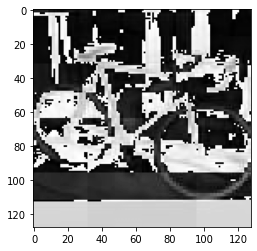

In [ ]:
im_har = w2d(rand_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [ ]:

se = {'motorcycle':1, 'motorbus':2, 'boat':3, 'truck':4, 'seaplane':5, 'airplane':6, 'bicycle':7}

In [ ]:
X, y = [], []
for vehicle, training_files  in vehicle_dict.items():

    for training_image in training_files:

        img = cv2.imread(training_image)

        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        d = [0]*7
        d[se[vehicle]-1]=1
        y.append(d)

In [ ]:
X_test,y_val =[],[]
for vehicle , testing_files in test_dict.items():
    for testing_image in testing_files:
        img = cv2.imread(testing_image)

        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X_test.append(combined_img)
        d = [0]*7
        d[se[vehicle]-1]=1
        y_val.append(d)

In [ ]:
X[0].shape

(4096, 1)

In [ ]:
X = np.array(X).reshape(len(X),4096).astype(float)



In [ ]:
X_test = np.array(X_test).reshape(len(X_test),4096).astype(float)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=20)

In [ ]:
x_train

array([[  1.,   1.,   1., ..., 200., 206., 212.],
       [254., 254., 254., ...,  15.,  14.,  14.],
       [ 79.,  79.,  79., ...,  94., 102., 114.],
       ...,
       [156., 184., 167., ..., 158., 156., 122.],
       [242., 234., 221., ...,  35.,  29.,  32.],
       [154., 141., 127., ..., 176., 116., 116.]])

In [ ]:
y_train = np.array(y_train)
y_val = np.array(y_val)

In [ ]:
y_train

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
x_train.shape

(2112, 4096)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import SGD,RMSprop,Adam

###  Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.

In [ ]:
from keras import backend as K

def f1(y_true, Y_pred):
    def recall(y_true, Y_pred):
        """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * Y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

    def precision(y_true, Y_pred):
        """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * Y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(Y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

    precision = precision(y_true, Y_pred)
    recall = recall(y_true, Y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.

In [ ]:



model = keras.Sequential([

  keras.layers.Dense(512, activation='sigmoid', input_dim=x_train.shape[1]),
  keras.layers.BatchNormalization(),

  keras.layers.Dense(256, activation='sigmoid'),
  keras.layers.BatchNormalization(),

  keras.layers.Dense(64, activation='sigmoid'),
  keras.layers.BatchNormalization(),



  keras.layers.Dense(7, activation='softmax'),




])

model.compile(loss='categorical_crossentropy',
            optimizer=SGD(learning_rate=0.01), metrics=['accuracy',f1])


In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 512)               2097664   
                                                                 
 batch_normalization_35 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_49 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_36 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_50 (Dense)            (None, 64)                16448     
                                                                 
 batch_normalization_37 (Bat  (None, 64)             

In [ ]:
model.fit(x_train, y_train, verbose=1,batch_size=128, epochs=50,validation_data=(x_val,y_val))

Epoch 1/50


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: expected an indented block (__autograph_generated_file67ashwg5.py, line 15)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: expected an indented block (__autograph_generated_file67ashwg5.py, line 15)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
17/17 [==============================] - 2s 39ms/step - loss: 2.3063 - accuracy: 0.1989 - f1: 0.0712 - val_loss: 2.1008 - val_accuracy: 0.1313 - val_f1: 0.0000e+00
Epoch 2/50
17/17 [==============================] - 0s 29ms/step - loss: 2.0186 - accuracy: 0.2301 - f1: 0.0322 - val_loss: 2.0744 - val_accuracy: 0.1313 - val_f1: 0.0000e+00
Epoch 3/50
17/17 [==============================] - 0s 28ms/step - loss: 2.0030 - accuracy: 0.2183 - f1: 0.0285 - val_loss: 2.0471 - val_accuracy: 0.1313 - val_f1: 0.0000e+00
Epoch 4/50
17/17 [==============================] - 0s 28ms/step - loss: 2.0037 - accuracy: 0.2008 - f1: 0.0175 - val_loss: 2.0253 - val_accuracy: 0.

In [ ]:
acc=model.evaluate(x_train,y_train)[1]
pred=model.predict(x_val)
y_val_arg=np.argmax(y_val,axis=1)
Y_pred = np.argmax(pred,axis=1)
acc

66/66 [==============================] - 0s 4ms/step - loss: 1.9706 - accuracy: 0.1880 - f1: 0.0204


0.1879734843969345

In [ ]:
m1=[acc,f1_score(y_val_arg,Y_pred,average="micro"),f1_score(y_val_arg,Y_pred,average="macro")]
m1

[0.1879734843969345, 0.18874172185430463, 0.06483548585884515]

In [ ]:
## B


In [ ]:
model = keras.Sequential([

  keras.layers.Dense(1024, activation='sigmoid', input_dim=x_train.shape[1]),
  keras.layers.BatchNormalization(),

  keras.layers.Dense(512, activation='sigmoid'),
  keras.layers.BatchNormalization(),

  keras.layers.Dense(256, activation='sigmoid'),
  keras.layers.BatchNormalization(),



  keras.layers.Dense(7, activation='softmax'),




])

model.compile(loss='categorical_crossentropy',
            optimizer=SGD(learning_rate=0.01), metrics=['accuracy',f1])

In [ ]:
model.fit(x_train, y_train, verbose=1,batch_size=128, epochs=50,validation_data=(x_val,y_val))

Epoch 1/50
17/17 [==============================] - 2s 62ms/step - loss: 1.9042 - accuracy: 0.3248 - f1: 0.1351 - val_loss: 1.9452 - val_accuracy: 0.1313 - val_f1: 0.0000e+00
Epoch 2/50
17/17 [==============================] - 1s 51ms/step - loss: 1.7900 - accuracy: 0.3409 - f1: 0.1291 - val_loss: 1.9454 - val_accuracy: 0.1313 - val_f1: 0.0000e+00
Epoch 3/50
17/17 [==============================] - 1s 52ms/step - loss: 1.7739 - accuracy: 0.3224 - f1: 0.1268 - val_loss: 1.9367 - val_accuracy: 0.1313 - val_f1: 0.0000e+00
Epoch 4/50
17/17 [==============================] - 1s 53ms/step - loss: 1.8634 - accuracy: 0.2292 - f1: 0.0694 - val_loss: 1.9365 - val_accuracy: 0.1313 - val_f1: 0.0000e+00
Epoch 5/50
17/17 [==============================] - 1s 51ms/step - loss: 1.8641 - accuracy: 0.2666 - f1: 0.0653 - val_loss: 1.9370 - val_accuracy: 0.1313 - val_f1: 0.0000e+00
Epoch 6/50
17/17 [==============================] - 1s 51ms/step - loss: 1.8316 - accuracy: 0.2443 - f1: 0.0584 - val_loss: 1

In [ ]:
acc=model.evaluate(x_train,y_train)[1]
pred=model.predict(x_val)
y_val_arg=np.argmax(y_val,axis=1)
Y_pred = np.argmax(pred,axis=1)
acc

66/66 [==============================] - 1s 8ms/step - loss: 5.2635 - accuracy: 0.2448 - f1: 0.2434


0.2447916716337204

In [ ]:
m2=[acc,f1_score(y_val_arg,Y_pred,average="micro"),f1_score(y_val_arg,Y_pred,average="macro")]
m2

[0.2447916716337204, 0.19426048565121412, 0.07755244429243734]

In [ ]:
m2

[0.2447916716337204, 0.19426048565121412, 0.07755244429243734]

In [ ]:
model = keras.Sequential([

  keras.layers.Dense(1024, activation='sigmoid', input_dim=x_train.shape[1]),
  keras.layers.BatchNormalization(),

  keras.layers.Dense(512, activation='sigmoid'),
  keras.layers.BatchNormalization(),

  keras.layers.Dense(256, activation='sigmoid'),
  keras.layers.BatchNormalization(),

  keras.layers.Dense(64, activation='sigmoid'),
  keras.layers.BatchNormalization(),



  keras.layers.Dense(7, activation='softmax'),




])

model.compile(loss='categorical_crossentropy',
            optimizer=SGD(learning_rate=0.01), metrics=['accuracy',f1])

In [ ]:
model.fit(x_train, y_train, verbose=1,batch_size=128, epochs=50,validation_data=(x_val,y_val))

Epoch 1/50
17/17 [==============================] - 2s 64ms/step - loss: 2.0014 - accuracy: 0.2765 - f1: 0.1158 - val_loss: 2.2736 - val_accuracy: 0.0993 - val_f1: 0.0000e+00
Epoch 2/50
17/17 [==============================] - 1s 50ms/step - loss: 1.9597 - accuracy: 0.2472 - f1: 0.0956 - val_loss: 2.2217 - val_accuracy: 0.2064 - val_f1: 0.0000e+00
Epoch 3/50
17/17 [==============================] - 1s 51ms/step - loss: 1.9592 - accuracy: 0.2580 - f1: 0.0699 - val_loss: 2.1714 - val_accuracy: 0.2064 - val_f1: 0.0000e+00
Epoch 4/50
17/17 [==============================] - 1s 52ms/step - loss: 1.9245 - accuracy: 0.2481 - f1: 0.0547 - val_loss: 2.1314 - val_accuracy: 0.2064 - val_f1: 0.0000e+00
Epoch 5/50
17/17 [==============================] - 1s 52ms/step - loss: 1.8439 - accuracy: 0.2372 - f1: 0.0547 - val_loss: 2.0938 - val_accuracy: 0.2064 - val_f1: 0.0000e+00
Epoch 6/50
17/17 [==============================] - 1s 51ms/step - loss: 1.7633 - accuracy: 0.2926 - f1: 0.0887 - val_loss: 2

In [ ]:
acc=model.evaluate(x_train,y_train)[1]
pred=model.predict(x_val)
y_val_arg=np.argmax(y_val,axis=1)
Y_pred = np.argmax(pred,axis=1)
acc

66/66 [==============================] - 1s 8ms/step - loss: 6.7106 - accuracy: 0.1174 - f1: 0.1160


0.11742424219846725

In [ ]:
m3=[acc,f1_score(y_val_arg,Y_pred,average="micro"),f1_score(y_val_arg,Y_pred,average="macro")]
m3

[0.11742424219846725, 0.10154525386313465, 0.04274276814777508]

In [ ]:
m3

[0.11742424219846725, 0.10154525386313465, 0.04274276814777508]

In [ ]:
## C

In [ ]:
model = keras.Sequential([

  keras.layers.Dense(1024, activation='relu', input_dim=x_train.shape[1]),
  keras.layers.BatchNormalization(),

  keras.layers.Dense(512, activation='relu'),
  keras.layers.BatchNormalization(),

  keras.layers.Dense(256, activation='relu'),
  keras.layers.BatchNormalization(),



  keras.layers.Dense(7, activation='softmax'),




])

model.compile(loss='categorical_crossentropy',
            optimizer=SGD(learning_rate=0.01), metrics=['accuracy',f1])

In [ ]:
model.fit(x_train, y_train, verbose=1,batch_size=128, epochs=50,validation_data=(x_val,y_val))

Epoch 1/50
17/17 [==============================] - 2s 63ms/step - loss: 1.3228 - accuracy: 0.5421 - f1: 0.4141 - val_loss: 6.4467 - val_accuracy: 0.2494 - val_f1: 0.2629
Epoch 2/50
17/17 [==============================] - 1s 52ms/step - loss: 0.5543 - accuracy: 0.8329 - f1: 0.7454 - val_loss: 4.2270 - val_accuracy: 0.3135 - val_f1: 0.3166
Epoch 3/50
17/17 [==============================] - 1s 51ms/step - loss: 0.3413 - accuracy: 0.9171 - f1: 0.8603 - val_loss: 3.4194 - val_accuracy: 0.2870 - val_f1: 0.2797
Epoch 4/50
17/17 [==============================] - 1s 51ms/step - loss: 0.2297 - accuracy: 0.9579 - f1: 0.9256 - val_loss: 2.0297 - val_accuracy: 0.4117 - val_f1: 0.3975
Epoch 5/50
17/17 [==============================] - 1s 51ms/step - loss: 0.1618 - accuracy: 0.9811 - f1: 0.9540 - val_loss: 2.0670 - val_accuracy: 0.4018 - val_f1: 0.3732
Epoch 6/50
17/17 [==============================] - 1s 50ms/step - loss: 0.1207 - accuracy: 0.9915 - f1: 0.9775 - val_loss: 1.2985 - val_accuracy

In [ ]:
acc=model.evaluate(x_train,y_train)[1]
pred=model.predict(x_val)
y_val_arg=np.argmax(y_val,axis=1)
Y_pred = np.argmax(pred,axis=1)
acc

66/66 [==============================] - 1s 9ms/step - loss: 0.0112 - accuracy: 0.9981 - f1: 0.9976


0.998106062412262

In [ ]:
m4=[acc,f1_score(y_val_arg,Y_pred,average="micro"),f1_score(y_val_arg,Y_pred,average="macro")]
m4

[0.998106062412262, 0.8454746136865343, 0.8318359474040279]

In [ ]:
m4

[0.998106062412262, 0.8454746136865343, 0.8318359474040279]

In [ ]:
from keras.layers import BatchNormalization,Dropout

In [ ]:
model = keras.Sequential()

model.add(Dense(1024, activation="tanh", input_dim=x_train.shape[1]))
model.add(BatchNormalization())

model.add(Dense(512, activation="tanh"))
model.add(BatchNormalization())

model.add(Dense(256, activation="tanh"))
model.add(BatchNormalization())



model.add(Dense(7, activation='softmax'))


model.compile(loss='categorical_crossentropy',
            optimizer=SGD(learning_rate=0.01), metrics=['accuracy',f1])

In [ ]:
model.fit(x_train, y_train, verbose=1,batch_size=128, epochs=50,validation_data=(x_val,y_val))

Epoch 1/50
17/17 [==============================] - 2s 63ms/step - loss: 2.2202 - accuracy: 0.2235 - f1: 0.0850 - val_loss: 2.1119 - val_accuracy: 0.1049 - val_f1: 0.0000e+00
Epoch 2/50
17/17 [==============================] - 1s 51ms/step - loss: 1.9828 - accuracy: 0.2429 - f1: 0.0827 - val_loss: 2.3818 - val_accuracy: 0.0784 - val_f1: 0.0000e+00
Epoch 3/50
17/17 [==============================] - 1s 51ms/step - loss: 1.9585 - accuracy: 0.2410 - f1: 0.0634 - val_loss: 2.4572 - val_accuracy: 0.0784 - val_f1: 0.0000e+00
Epoch 4/50
17/17 [==============================] - 1s 52ms/step - loss: 1.8883 - accuracy: 0.2713 - f1: 0.0800 - val_loss: 2.8849 - val_accuracy: 0.0784 - val_f1: 0.0750
Epoch 5/50
17/17 [==============================] - 1s 50ms/step - loss: 1.8652 - accuracy: 0.2396 - f1: 0.0616 - val_loss: 2.8784 - val_accuracy: 0.0784 - val_f1: 0.0760
Epoch 6/50
17/17 [==============================] - 1s 50ms/step - loss: 1.8110 - accuracy: 0.2538 - f1: 0.0708 - val_loss: 3.0620 - 

In [ ]:
acc=model.evaluate(x_train,y_train)[1]
pred=model.predict(x_val)
y_val_arg=np.argmax(y_val,axis=1)
Y_pred = np.argmax(pred,axis=1)
acc

66/66 [==============================] - 1s 8ms/step - loss: 1.9134 - accuracy: 0.2817 - f1: 0.0724


0.2817234992980957

In [ ]:
m5=[acc,f1_score(y_val_arg,Y_pred,average="micro"),f1_score(y_val_arg,Y_pred,average="macro")]
m5

[0.2817234992980957, 0.2273730684326711, 0.1205334860550575]

In [ ]:
m5

[0.2817234992980957, 0.2273730684326711, 0.1205334860550575]

In [ ]:
## D

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
model = keras.Sequential()

model.add(Dense(1024, activation="tanh", input_dim=x_train.shape[1]))
model.add(BatchNormalization())

model.add(Dense(512, activation="tanh"))
model.add(BatchNormalization())

model.add(Dense(256, activation="tanh"))
model.add(BatchNormalization())



model.add(Dense(7, activation='softmax'))


model.compile(loss='categorical_crossentropy',
            optimizer=SGD(learning_rate=0.01), metrics=['accuracy',f1])

In [ ]:
model.fit(x_train, y_train, verbose=1,batch_size=128, epochs=50,validation_data=(x_val,y_val),callbacks=[callback])

Epoch 1/50
17/17 [==============================] - 2s 63ms/step - loss: 2.1855 - accuracy: 0.2372 - f1: 0.0896 - val_loss: 2.1007 - val_accuracy: 0.1468 - val_f1: 0.0000e+00
Epoch 2/50
17/17 [==============================] - 1s 52ms/step - loss: 2.1485 - accuracy: 0.2188 - f1: 0.0561 - val_loss: 2.1119 - val_accuracy: 0.1865 - val_f1: 0.0000e+00
Epoch 3/50
17/17 [==============================] - 1s 51ms/step - loss: 2.0146 - accuracy: 0.2135 - f1: 0.0469 - val_loss: 2.0585 - val_accuracy: 0.1887 - val_f1: 0.0000e+00
Epoch 4/50
17/17 [==============================] - 1s 50ms/step - loss: 1.9154 - accuracy: 0.2334 - f1: 0.0630 - val_loss: 2.0184 - val_accuracy: 0.1954 - val_f1: 0.0000e+00
Epoch 5/50
17/17 [==============================] - 1s 51ms/step - loss: 1.8322 - accuracy: 0.2396 - f1: 0.0694 - val_loss: 1.9692 - val_accuracy: 0.1909 - val_f1: 0.0000e+00
Epoch 6/50
17/17 [==============================] - 1s 50ms/step - loss: 1.7982 - accuracy: 0.2491 - f1: 0.0781 - val_loss: 2

In [ ]:
acc=model.evaluate(x_train,y_train)[1]
pred=model.predict(x_val)
y_val_arg=np.argmax(y_val,axis=1)
Y_pred = np.argmax(pred,axis=1)
acc

66/66 [==============================] - 1s 8ms/step - loss: 1.9050 - accuracy: 0.2661 - f1: 0.0881


0.2660984992980957

In [ ]:
m6=[acc,f1_score(y_val_arg,Y_pred,average="micro"),f1_score(y_val_arg,Y_pred,average="macro")]
m6

[0.2660984992980957, 0.20529801324503313, 0.10489822045265378]

In [ ]:
m6

[0.2660984992980957, 0.20529801324503313, 0.10489822045265378]

In [ ]:
## Droput


In [ ]:
model = keras.Sequential()

model.add(Dense(1024, activation="tanh", input_dim=x_train.shape[1]))
model.add(BatchNormalization())

model.add(Dense(512, activation="tanh"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(256, activation="tanh"))
model.add(BatchNormalization())
model.add(Dropout(0.3))



model.add(Dense(7, activation='softmax'))


model.compile(loss='categorical_crossentropy',
            optimizer=SGD(learning_rate=0.01), metrics=['accuracy',f1])

In [ ]:
model.fit(x_train, y_train, verbose=1,batch_size=128, epochs=50,validation_data=(x_val,y_val))

Epoch 1/50
17/17 [==============================] - 2s 64ms/step - loss: 2.7104 - accuracy: 0.1681 - f1: 0.0772 - val_loss: 2.3765 - val_accuracy: 0.1313 - val_f1: 9.7656e-04
Epoch 2/50
17/17 [==============================] - 1s 54ms/step - loss: 2.4516 - accuracy: 0.1795 - f1: 0.0432 - val_loss: 2.5299 - val_accuracy: 0.1038 - val_f1: 0.0000e+00
Epoch 3/50
17/17 [==============================] - 1s 52ms/step - loss: 2.3745 - accuracy: 0.1785 - f1: 0.0414 - val_loss: 2.8525 - val_accuracy: 0.1004 - val_f1: 0.1004
Epoch 4/50
17/17 [==============================] - 1s 55ms/step - loss: 2.2137 - accuracy: 0.1927 - f1: 0.0381 - val_loss: 2.9008 - val_accuracy: 0.1071 - val_f1: 0.0000e+00
Epoch 5/50
17/17 [==============================] - 1s 52ms/step - loss: 2.1765 - accuracy: 0.1771 - f1: 0.0349 - val_loss: 3.0976 - val_accuracy: 0.1336 - val_f1: 0.0000e+00
Epoch 6/50
17/17 [==============================] - 1s 54ms/step - loss: 2.1010 - accuracy: 0.2045 - f1: 0.0542 - val_loss: 3.288

In [ ]:
acc=model.evaluate(x_train,y_train)[1]
pred=model.predict(x_val)
y_val_arg=np.argmax(y_val,axis=1)
Y_pred = np.argmax(pred,axis=1)
acc

66/66 [==============================] - 1s 9ms/step - loss: 2.0229 - accuracy: 0.2022 - f1: 0.0758


0.20217803120613098

In [ ]:
m7=[acc,f1_score(y_val_arg,Y_pred,average="micro"),f1_score(y_val_arg,Y_pred,average="macro")]
m7

[0.20217803120613098, 0.15673289183222958, 0.09139155010044421]

In [ ]:
m7

[0.20217803120613098, 0.15673289183222958, 0.09139155010044421]

In [ ]:
## E

In [ ]:

from keras.layers import Dense,Dropout
layer="relu"
model = keras.Sequential()

model.add(Dense(1024, activation=layer, input_dim=x_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(512, activation=layer))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(256, activation=layer))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Dense(7, activation='softmax',kernel_regularizer="l1"))

model.compile(loss='categorical_crossentropy',
            optimizer=RMSprop(learning_rate=0.1), metrics=['accuracy',f1])

In [ ]:
model.fit(x_train, y_train, verbose=1,batch_size=128, epochs=50,validation_data=(x_val,y_val))

Epoch 1/50
17/17 [==============================] - 3s 80ms/step - loss: 7.5376 - accuracy: 0.4266 - f1: 0.4182 - val_loss: 667.8200 - val_accuracy: 0.1104 - val_f1: 0.1322
Epoch 2/50
17/17 [==============================] - 1s 67ms/step - loss: 1.3089 - accuracy: 0.6245 - f1: 0.5735 - val_loss: 184.8534 - val_accuracy: 0.1722 - val_f1: 0.1869
Epoch 3/50
17/17 [==============================] - 1s 69ms/step - loss: 1.5048 - accuracy: 0.5994 - f1: 0.5593 - val_loss: 49.1316 - val_accuracy: 0.2053 - val_f1: 0.2162
Epoch 4/50
17/17 [==============================] - 1s 67ms/step - loss: 0.9649 - accuracy: 0.7079 - f1: 0.6562 - val_loss: 5.9772 - val_accuracy: 0.4713 - val_f1: 0.4957
Epoch 5/50
17/17 [==============================] - 1s 68ms/step - loss: 2.0233 - accuracy: 0.6127 - f1: 0.5905 - val_loss: 5.8362 - val_accuracy: 0.5960 - val_f1: 0.6041
Epoch 6/50
17/17 [==============================] - 1s 65ms/step - loss: 1.0255 - accuracy: 0.7088 - f1: 0.6650 - val_loss: 33.2135 - val_ac

In [ ]:
acc=model.evaluate(x_train,y_train)[1]
pred=model.predict(x_val)
y_val_arg=np.argmax(y_val,axis=1)
Y_pred = np.argmax(pred,axis=1)
acc

66/66 [==============================] - 1s 8ms/step - loss: 5.8584 - accuracy: 0.6771 - f1: 0.6766


0.6770833134651184

In [ ]:
m8=[acc,f1_score(y_val_arg,Y_pred,average="micro"),f1_score(y_val_arg,Y_pred,average="macro")]
m8

[0.6770833134651184, 0.5805739514348786, 0.555842612982973]

In [ ]:
m8

[0.6770833134651184, 0.5805739514348786, 0.555842612982973]

In [ ]:

act="selu"
model = keras.Sequential([

  keras.layers.Dense(1024, activation=act, input_dim=x_train.shape[1]),
  keras.layers.BatchNormalization(),
   Dropout(0.3) ,

  keras.layers.Dense(512, activation=act),
  keras.layers.BatchNormalization(),
  Dropout(0.3) ,
  keras.layers.Dense(256, activation=act),
  keras.layers.BatchNormalization(),
   Dropout(0.3) ,



  keras.layers.Dense(7, activation='softmax'),




])

model.compile(loss='categorical_crossentropy',
            optimizer=Adam(learning_rate=0.1), metrics=['accuracy',f1])

In [ ]:
model.fit(x_train, y_train, verbose=1,batch_size=128, epochs=50,validation_data=(x_val,y_val))

Epoch 1/50
17/17 [==============================] - 2s 68ms/step - loss: 3.2304 - accuracy: 0.4332 - f1: 0.4196 - val_loss: 962.8024 - val_accuracy: 0.1943 - val_f1: 0.2180
Epoch 2/50
17/17 [==============================] - 1s 57ms/step - loss: 1.2435 - accuracy: 0.5895 - f1: 0.5115 - val_loss: 111.4652 - val_accuracy: 0.2241 - val_f1: 0.2674
Epoch 3/50
17/17 [==============================] - 1s 59ms/step - loss: 0.9712 - accuracy: 0.6634 - f1: 0.5859 - val_loss: 26.7350 - val_accuracy: 0.3852 - val_f1: 0.3984
Epoch 4/50
17/17 [==============================] - 1s 58ms/step - loss: 0.7846 - accuracy: 0.7206 - f1: 0.6677 - val_loss: 11.1557 - val_accuracy: 0.4558 - val_f1: 0.4820
Epoch 5/50
17/17 [==============================] - 1s 57ms/step - loss: 0.6591 - accuracy: 0.7590 - f1: 0.7215 - val_loss: 6.3827 - val_accuracy: 0.5287 - val_f1: 0.5445
Epoch 6/50
17/17 [==============================] - 1s 58ms/step - loss: 0.5699 - accuracy: 0.7912 - f1: 0.7578 - val_loss: 5.8766 - val_ac

In [ ]:
acc=model.evaluate(x_train,y_train)[1]
pred=model.predict(x_val)
y_val_arg=np.argmax(y_val,axis=1)
Y_pred = np.argmax(pred,axis=1)
acc

66/66 [==============================] - 1s 8ms/step - loss: 3.6688 - accuracy: 0.6562 - f1: 0.6539


0.65625

In [ ]:
m9=[acc,f1_score(y_val_arg,Y_pred,average="micro"),f1_score(y_val_arg,Y_pred,average="macro")]
m9

[0.65625, 0.5794701986754967, 0.5732125987532338]

In [ ]:
m9

[0.65625, 0.5794701986754967, 0.5732125987532338]

In [ ]:
table=pd.DataFrame({"BaseLine NN":m1,"Diffrent Neurons and Layers":m2,"relu activaton":m3,"Early Stopping":m4,"Dropout":m5,"RmsProp optimizer":m6,"Adam":m7,"spare":m8},index=["Accuracy","micro","macro"])

In [ ]:
table

,BaseLine NN,Diffrent Neurons and Layers,relu activaton,Early Stopping,Dropout,RmsProp optimizer,Adam
Accuracy,0.187973,0.244792,0.117424,0.998106,0.281723,0.266098,0.202178
micro,0.188742,0.194260,0.101545,0.845475,0.227373,0.205298,0.156733
macro,0.064835,0.077552,0.042743,0.831836,0.120533,0.104898,0.091392


In [ ]:
from scipy.stats import t
f_loss=np.array(table.loc["Accuracy"].tolist())
f_acc=np.array(table.loc['micro'].tolist())
f_f1=np.array(table.loc['macro'].tolist())
def confidence(arr):
    m=arr.mean()
    s=arr.std()
    dof=len(arr)-1
    conf=0.95
    t_crit = np.abs(t.ppf((1-conf)/2,dof))
    return [m-s*t_crit/np.sqrt(len(arr)), m+s*t_crit/np.sqrt(len(arr))]

In [ ]:
con_mape=confidence(f_loss)
con_mae=confidence(f_acc)
con_mse=confidence(f_f1)

In [ ]:
con_mape,con_mae,con_mse

([0.07104714795837702, 0.5856087064541105],
 [0.05573740355704912, 0.4926700388901284],
 [-0.052581258267589054, 0.43366408749937224])

In [ ]:
ctable=pd.DataFrame({"Min":[con_mape[0],con_mae[0],con_mse[0]],"Max":[con_mape[1],con_mae[1],con_mse[1]]},index=["Accuracy","micro","macro"])

In [ ]:
ctable

,Min,Max
Accuracy,0.071047,0.585609
micro,0.055737,0.492670
macro,-0.052581,0.433664


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
acc=model.evaluate(x_train,y_train)[1]
pred=model.predict(x_val)
y_val_arg=np.argmax(y_val,axis=1)
Y_pred = np.argmax(pred,axis=1)
acc

66/66 [==============================] - 1s 8ms/step - loss: 3.6688 - accuracy: 0.6562 - f1: 0.6539


0.65625

In [ ]:
a=[acc,f1_score(Y_pred,y_val_arg,average="micro"),f1_score(Y_pred,y_val_arg,average="macro")]

In [ ]:
a

[0.65625, 0.5794701986754967, 0.5732125987532338]

In [ ]:
model = keras.Sequential([

  keras.layers.Dense(1024, activation='relu', input_dim=x_train.shape[1]),
  keras.layers.BatchNormalization(),

  keras.layers.Dense(512, activation='relu'),
  keras.layers.BatchNormalization(),

  keras.layers.Dense(256, activation='relu'),
  keras.layers.BatchNormalization(),



  keras.layers.Dense(7, activation='softmax'),




])

model.compile(loss='categorical_crossentropy',
            optimizer=SGD(learning_rate=0.01), metrics=['accuracy',f1])

In [ ]:
model.fit(x_train, y_train, verbose=1,batch_size=128, epochs=50,validation_data=(x_val,y_val))

Epoch 1/50
17/17 [==============================] - 2s 69ms/step - loss: 1.2374 - accuracy: 0.5805 - f1: 0.4435 - val_loss: 3.1617 - val_accuracy: 0.4040 - val_f1: 0.4158
Epoch 2/50
17/17 [==============================] - 1s 50ms/step - loss: 0.5205 - accuracy: 0.8433 - f1: 0.7601 - val_loss: 2.1452 - val_accuracy: 0.4194 - val_f1: 0.3850
Epoch 3/50
17/17 [==============================] - 1s 52ms/step - loss: 0.3372 - accuracy: 0.9148 - f1: 0.8543 - val_loss: 1.9274 - val_accuracy: 0.4238 - val_f1: 0.3994
Epoch 4/50
17/17 [==============================] - 1s 52ms/step - loss: 0.2194 - accuracy: 0.9626 - f1: 0.9242 - val_loss: 1.1890 - val_accuracy: 0.5817 - val_f1: 0.5096
Epoch 5/50
17/17 [==============================] - 1s 51ms/step - loss: 0.1624 - accuracy: 0.9792 - f1: 0.9609 - val_loss: 1.4283 - val_accuracy: 0.4978 - val_f1: 0.4277
Epoch 6/50
17/17 [==============================] - 1s 49ms/step - loss: 0.1256 - accuracy: 0.9910 - f1: 0.9789 - val_loss: 0.8350 - val_accuracy

In [ ]:
acc=model.evaluate(x_train,y_train)[1]
pred=model.predict(x_val)
y_val_arg=np.argmax(y_val,axis=1)
Y_pred = np.argmax(pred,axis=1)
acc

66/66 [==============================] - 1s 9ms/step - loss: 0.0158 - accuracy: 0.9967 - f1: 0.9962


0.9966856241226196

In [ ]:
fm=[acc,f1_score(y_val_arg,Y_pred,average="micro"),f1_score(y_val_arg,Y_pred,average="macro")]
fm

[0.9966856241226196, 0.8377483443708609, 0.8205811594539919]

In [ ]:
test

['/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650252013181_11.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650253573594_14.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650252433418_13.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650253545766_13.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650250190585_12.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650253901249_12.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650248788180_16.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650252433418_11.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650252433418_6.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650252433418_5.jpg',
 '/content/gdrive/MyDrive/Colab 

In [ ]:
train=[]

In [ ]:
for img in train:
    gra=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    re=cv2.resize(gra,(32,32))
    re=re.reshape(32*32,)
    re=re/255
    train.append(re)

In [ ]:
test

['/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650252013181_11.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650253573594_14.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650252433418_13.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650253545766_13.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650250190585_12.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650253901249_12.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650248788180_16.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650252433418_11.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650252433418_6.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/hcaptcha_dataset/train/motorbus/1650252433418_5.jpg',
 '/content/gdrive/MyDrive/Colab 